In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import imutils

Text(0.5, 1.0, 'Ảnh gốc')

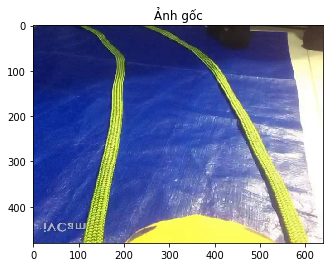

In [3]:
image_path = r'C:\Users\DucTRung\Documents\data_set\tracking_lane\image_test\straight0.jpg'
image = cv2.imread(image_path)
plt.imshow(imutils.opencv2matplotlib(image));
plt.title('Ảnh gốc')
#plt.savefig(r'C:\Users\DucTRung\Desktop\nckh\tracking_lane\original_image.jpg')

Text(0.5, 1.0, 'Ảnh trắng đen')

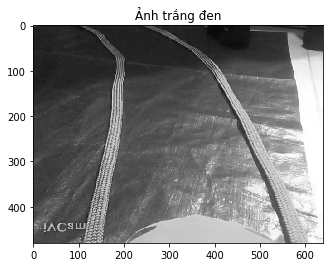

In [4]:
# Convert rgb colorspace image to gray image.
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_image, cmap='gray')
plt.title('Ảnh trắng đen')
#plt.savefig(r'C:\Users\DucTRung\Desktop\nckh\tracking_lane\gray_image.jpg')

# Smoothing images or Reducing noise

## Reference:
https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_filtering/py_filtering.html
https://en.wikipedia.org/wiki/Gaussian_blur
https://en.wikipedia.org/wiki/Gaussian_noise
https://www.opencv-srf.com/2018/01/filter-images-and-videos.html

## Abstract:
In image processing, a Gaussian blur (also known as Gaussian smoothing) is the result of blurring an image by a Gaussian function. It is a widely used effect in graphics software, typically to reduce image noise and reduce detail.

Mathematically, applying a Gaussian blur to an image is the same as convolving the image with a Gaussian function. Applying a Gaussian blur has the effect of reducing the image's high-frequency components; a Gaussian blur is thus a low pass filter.

Vì nhiễu có giá trị trung bình bằng 0, nên khi ta lấy trung bình nhiều điểm ảnh có giá trị giống nhau sẽ xóa được nhiễu. Đây là ý tưởng chính trong thuật toán xóa nhiễu dựa trên pixel hoặc patch, hay group-patch.

where x is the distance from the origin in the horizontal axis, y is the distance from the origin in the vertical axis, and σ is the standard deviation of the Gaussian distribution. When applied in two dimensions, this formula produces a surface whose contours are concentric circles with a Gaussian distribution from the center point. Values from this distribution are used to build a convolution matrix which is applied to the original image. This convolution process is illustrated visually in the figure on the right. Each pixel's new value is set to a weighted average of that pixel's neighborhood. The original pixel's value receives the heaviest weight (having the highest Gaussian value) and neighboring pixels receive smaller weights as their distance to the original pixel increases.

Probably the most useful filter (although not the fastest). Gaussian filtering is done by convolving each point in the input array with a Gaussian kernel and then summing them all to produce the output array.

(<matplotlib.axes._subplots.AxesSubplot at 0x21355f0a248>,
 Text(0.5, 1.0, 'Ảnh được giảm nhiễu'))

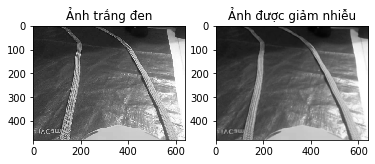

In [5]:
blurred_image = cv2.blur(gray_image, (5, 5))
plt.imshow(blurred_image, cmap='gray')

plt.subplot(121), plt.imshow(gray_image, cmap='gray'), plt.title('Ảnh trắng đen')
plt.subplot(122), plt.imshow(blurred_image, cmap='gray'), plt.title('Ảnh được giảm nhiễu')

#plt.savefig(r'C:\Users\DucTRung\Desktop\nckh\tracking_lane\blurred_image.jpg')

In [7]:
print('Ma trận cường độ điểm ảnh:\n', blurred_image)

Ma trận cường độ điểm ảnh:
 [[177 176 174 ...  52  52  52]
 [172 170 166 ...  52  52  52]
 [151 149 145 ...  52  52  52]
 ...
 [ 85  85  85 ... 246 246 246]
 [ 84  84  84 ... 246 246 246]
 [ 84  84  84 ... 246 246 246]]


# Edge Detection

## Reference:
https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_canny/py_canny.html

## Abstract:
Cạnh (edge) là nơi xảy ra sự thay đổi về cường độ điểm ảnh vượt ngưỡng, mà ngưỡng này có thể do ta quy định.

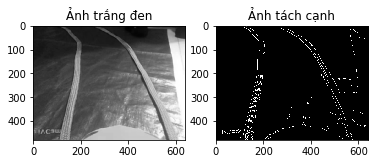

In [14]:
edge_image = cv2.Canny(blurred_image, 50, 150)
#plt.imshow(edge_image, cmap='gray')
#plt.title('Ảnh tách cạnh')
plt.subplot(121), plt.imshow(blurred_image, cmap='gray'), plt.title('Ảnh trắng đen')
plt.subplot(122), plt.imshow(edge_image, cmap='gray'), plt.title('Ảnh tách cạnh')
plt.savefig(r'C:\Users\DucTRung\Desktop\nckh\tracking_lane\edge_2_image.jpg')

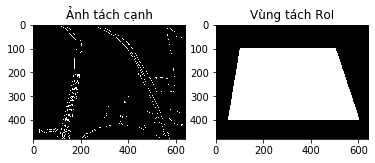

In [18]:
# Extract RoI
#height = image.shape[0]
roi_coordinates = np.array([[(50, 400),
                             (600, 400),
                             (500, 100),
                             (100, 100)]], np.int32)
roi_area = np.zeros_like(edge_image)
cv2.fillPoly(roi_area, roi_coordinates, 255)
roi_image = cv2.bitwise_and(edge_image, roi_area)

plt.subplot(121), plt.imshow(edge_image, cmap='gray'), plt.title('Ảnh tách cạnh')
plt.subplot(122), plt.imshow(roi_area, cmap='gray'), plt.title('Vùng tách RoI')

plt.savefig(r'C:\Users\DucTRung\Desktop\nckh\tracking_lane\roi_1_image.jpg')

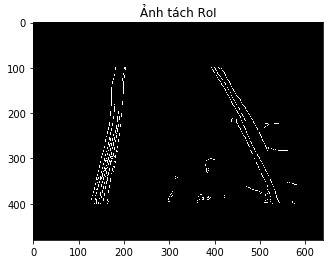

In [20]:
plt.imshow(roi_image, cmap='gray'), plt.title('Ảnh tách RoI')
plt.savefig(r'C:\Users\DucTRung\Desktop\nckh\tracking_lane\roi_2_image.jpg')

# Line Detection

# Reference:
https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_houghlines/py_houghlines.html
https://minhng.info/tutorials/phat-hien-duong-thang-hough-transform.html

# Abstract:


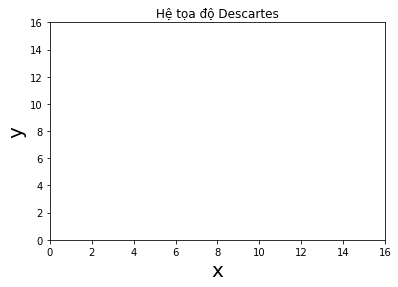

In [4]:
plt.axis([0, 16, 0, 16])
plt.xlabel('x', fontsize= 20)
plt.ylabel('y', fontsize= 20)
plt.title('Hệ tọa độ Descartes')

# x1 = 2
# y1 = 12
# plt.plot(x1, y1, 'ro', markersize= 15)
# plt.text(x1+1, y1+1, str((x1, y1)), fontsize= 15)

# # x2 = 1
# # y2 = 8
# # plt.plot(x2, y2, 'go', markersize= 15)
# # plt.text(x2+1, y2+1, str((x2, y2)), fontsize= 15)

# plt.plot([0, 3], [0, 16])
# plt.text(1, 4, 'y = 6*x + 0', fontsize= 15)

plt.savefig(r'C:\Users\DucTRung\Desktop\nckh\tracking_lane\Hough_transform\descartes_0.jpg')

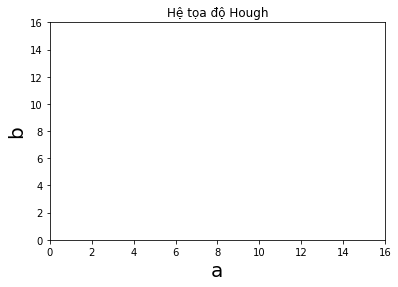

In [94]:
plt.axis([0, 16, 0, 16])
plt.xlabel('a', fontsize= 20)
plt.ylabel('b', fontsize= 20)
plt.title('Hệ tọa độ Hough')

#x1 = 2
#y1 = 8
#plt.plot(x1, y1, 'ro', markersize= 15)
#plt.text(x1+1, y1+1, str((x1, y1)), fontsize= 15)

#x2 = 4
#y2 = 4
#plt.plot(x2, y2, 'ro', markersize= 15)
#plt.text(x2+1, y2+1, str((x2, y2)), fontsize= 15)

#x3 = 6
#y3 = 0
#plt.plot(x3, y3, 'ro', markersize= 15)
#plt.text(x3+1, y3+1, str((x3, y3)), fontsize= 15)

# plt.plot([6, 0], [0, 12])
# plt.plot([8, 0], [0, 8])

# x4 = 4
# y4 = 4
# plt.plot(x4, y4, 'go', markersize= 15)
# plt.text(x4+1, y4+1, str((x4, y4)), fontsize= 15)

#plt.savefig(r'C:\Users\DucTRung\Desktop\nckh\tracking_lane\Hough_transform\hough_0.jpg')

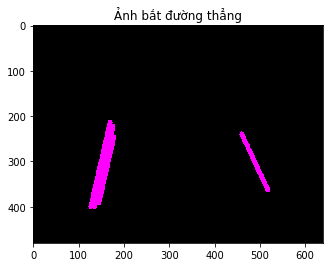

In [22]:
line_image = np.zeros_like(image)
lines = cv2.HoughLinesP(roi_image, 1, np.pi/180, 100, np.array ([ ]), minLineLength=100, maxLineGap=10)
for line in lines:
    for x1, y1, x2, y2 in line:
        cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 255), 10)

lane_image = cv2.addWeighted(image, 1, line_image, 0.8, 0)
plt.imshow(imutils.opencv2matplotlib(line_image)), plt.title('Ảnh bắt đường thẳng')

#plt.subplot(121), plt.imshow(line_image, cmap='gray'), plt.title('Lines')
#plt.subplot(122), plt.imshow(imutils.opencv2matplotlib(lane_image)), plt.title('Lane image')

plt.savefig(r'C:\Users\DucTRung\Desktop\nckh\tracking_lane\lines_image.jpg')

In [24]:
left_lines = []
right_lines = []
for line in lines:
    for x1, y1, x2, y2 in line:
        parameters = np.polyfit((x1.mean(), x2.mean()), (y1, y2), 1)
        slope = parameters[0]
        y_intercept = parameters[1]
        if slope < 0:
            left_lines.append((slope, y_intercept))
        else:
            right_lines.append((slope, y_intercept))
            
print('left_line:', left_lines)
print('right_line:', right_lines)
averaged_left_line = np.average(left_lines, axis=0)
averaged_right_line = np.average(right_lines, axis=0)
print('averaged_left_line:', averaged_left_line)
print('averaged_right_line:', averaged_right_line)

left_line: [(-4.360000000000001, 987.6000000000001), (-4.348837209302328, 952.3023255813954), (-4.393939393939386, 1028.1212121212106), (-4.34146341463414, 986.0975609756085)]
right_line: [(2.1379310344827607, -744.4482758620702)]
averaged_left_line: [ -4.36106    988.53027467]
averaged_right_line: [   2.13793103 -744.44827586]


In [27]:
def calculating_new_x_y(averaged_line):
    slope, y_intercept = averaged_line
    y1 = 400
    y2 = 200
    x1 = int((y1-y_intercept)/(slope))
    x2 = int((y2-y_intercept)/(slope))
    return [x1, y1, x2, y2]

535 400 441 200 134 400 180 200


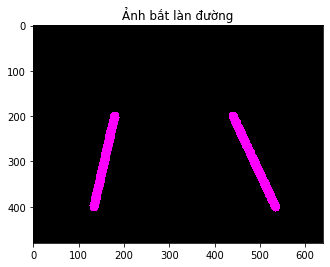

In [31]:
mask = np.zeros_like(image)
x1, y1, x2, y2 = calculating_new_x_y(averaged_right_line)
x3, y3, x4, y4 = calculating_new_x_y(averaged_left_line)
print(x1, y1, x2, y2, x3, y3, x4, y4)
cv2.line(mask, (x1, y1), (x2, y2), (255, 0, 255), 20)
cv2.line(mask, (x3, y3), (x4, y4), (255, 0, 255), 20)

plt.imshow(imutils.opencv2matplotlib(mask)), plt.title('Ảnh bắt làn đường')
plt.savefig(r'C:\Users\DucTRung\Desktop\nckh\tracking_lane\lane_image.jpg')

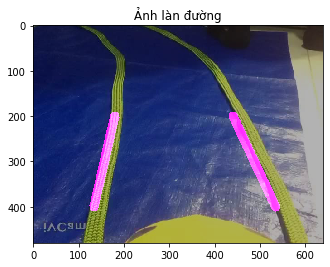

In [32]:
lane_image = cv2.addWeighted(mask, 1, image, 0.7, 0)
plt.imshow(imutils.opencv2matplotlib(lane_image)), plt.title('Ảnh làn đường')
plt.savefig(r'C:\Users\DucTRung\Desktop\nckh\tracking_lane\lane_2_image.jpg')

334 298 400 100


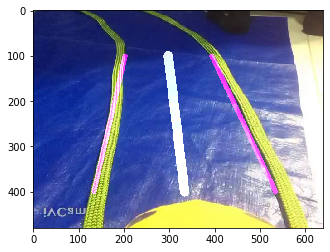

In [11]:
x1_cen = int((x1 + x3)/2)
x2_cen = int((x2 + x4)/2)
y1_cen = int((y1 + y3)/2)
y2_cen = int((y2 + y4)/2)
print(x1_cen, x2_cen, y1_cen, y2_cen)
cv2.line(mask, (x1_cen, y1_cen), (x2_cen, y2_cen), (255, 255, 255), 20)
lane_image = cv2.addWeighted(mask, 0.8, image, 1, 0)
plt.imshow(imutils.opencv2matplotlib(lane_image))